<h1> Change In Velocity Before And After Skin Regrowth </h1>


<h2>1. Imports And Data Loading </h2>

In [2]:
# Imports and settigs

import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
%matplotlib inline
from scipy import stats

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)


In [3]:
# Load the data

df = pd.read_csv("pre_post_aggregated.csv")


<h2>2. Statistics </h2>

p-value for non-normality is 0.8836049437522888


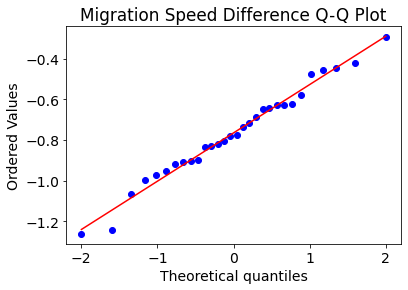

In [4]:
# Test for normality on the difference between conditions.

df['delta'] = df['pre'] - df['post']
stats.probplot(df['delta'], plot= plt)
plt.title('Migration Speed Difference Q-Q Plot')

# Check if the data is normally distributed

print('p-value for non-normality is ' + str(stats.shapiro(df['delta'])[1]))

In [5]:
# Calculate means for each group

mean_pre = df['pre'].mean()
mean_pre = round(mean_pre, 3)
print("mean velocity before healing = " + str(mean_pre) + "um")

mean_post = df['post'].mean()
mean_post = round(mean_post, 3)
print("mean velocity after healing = " + str(mean_post) + "um\n")

# Peform a paired t-test

p_value = stats.ttest_rel(df['pre'], df['post'])


print(str(p_value))

mean velocity before healing = 0.057um
mean velocity after healing = 0.822um

Ttest_relResult(statistic=-18.149301699784516, pvalue=2.241712248109421e-17)


<h2>3. Make The Plot </h2>

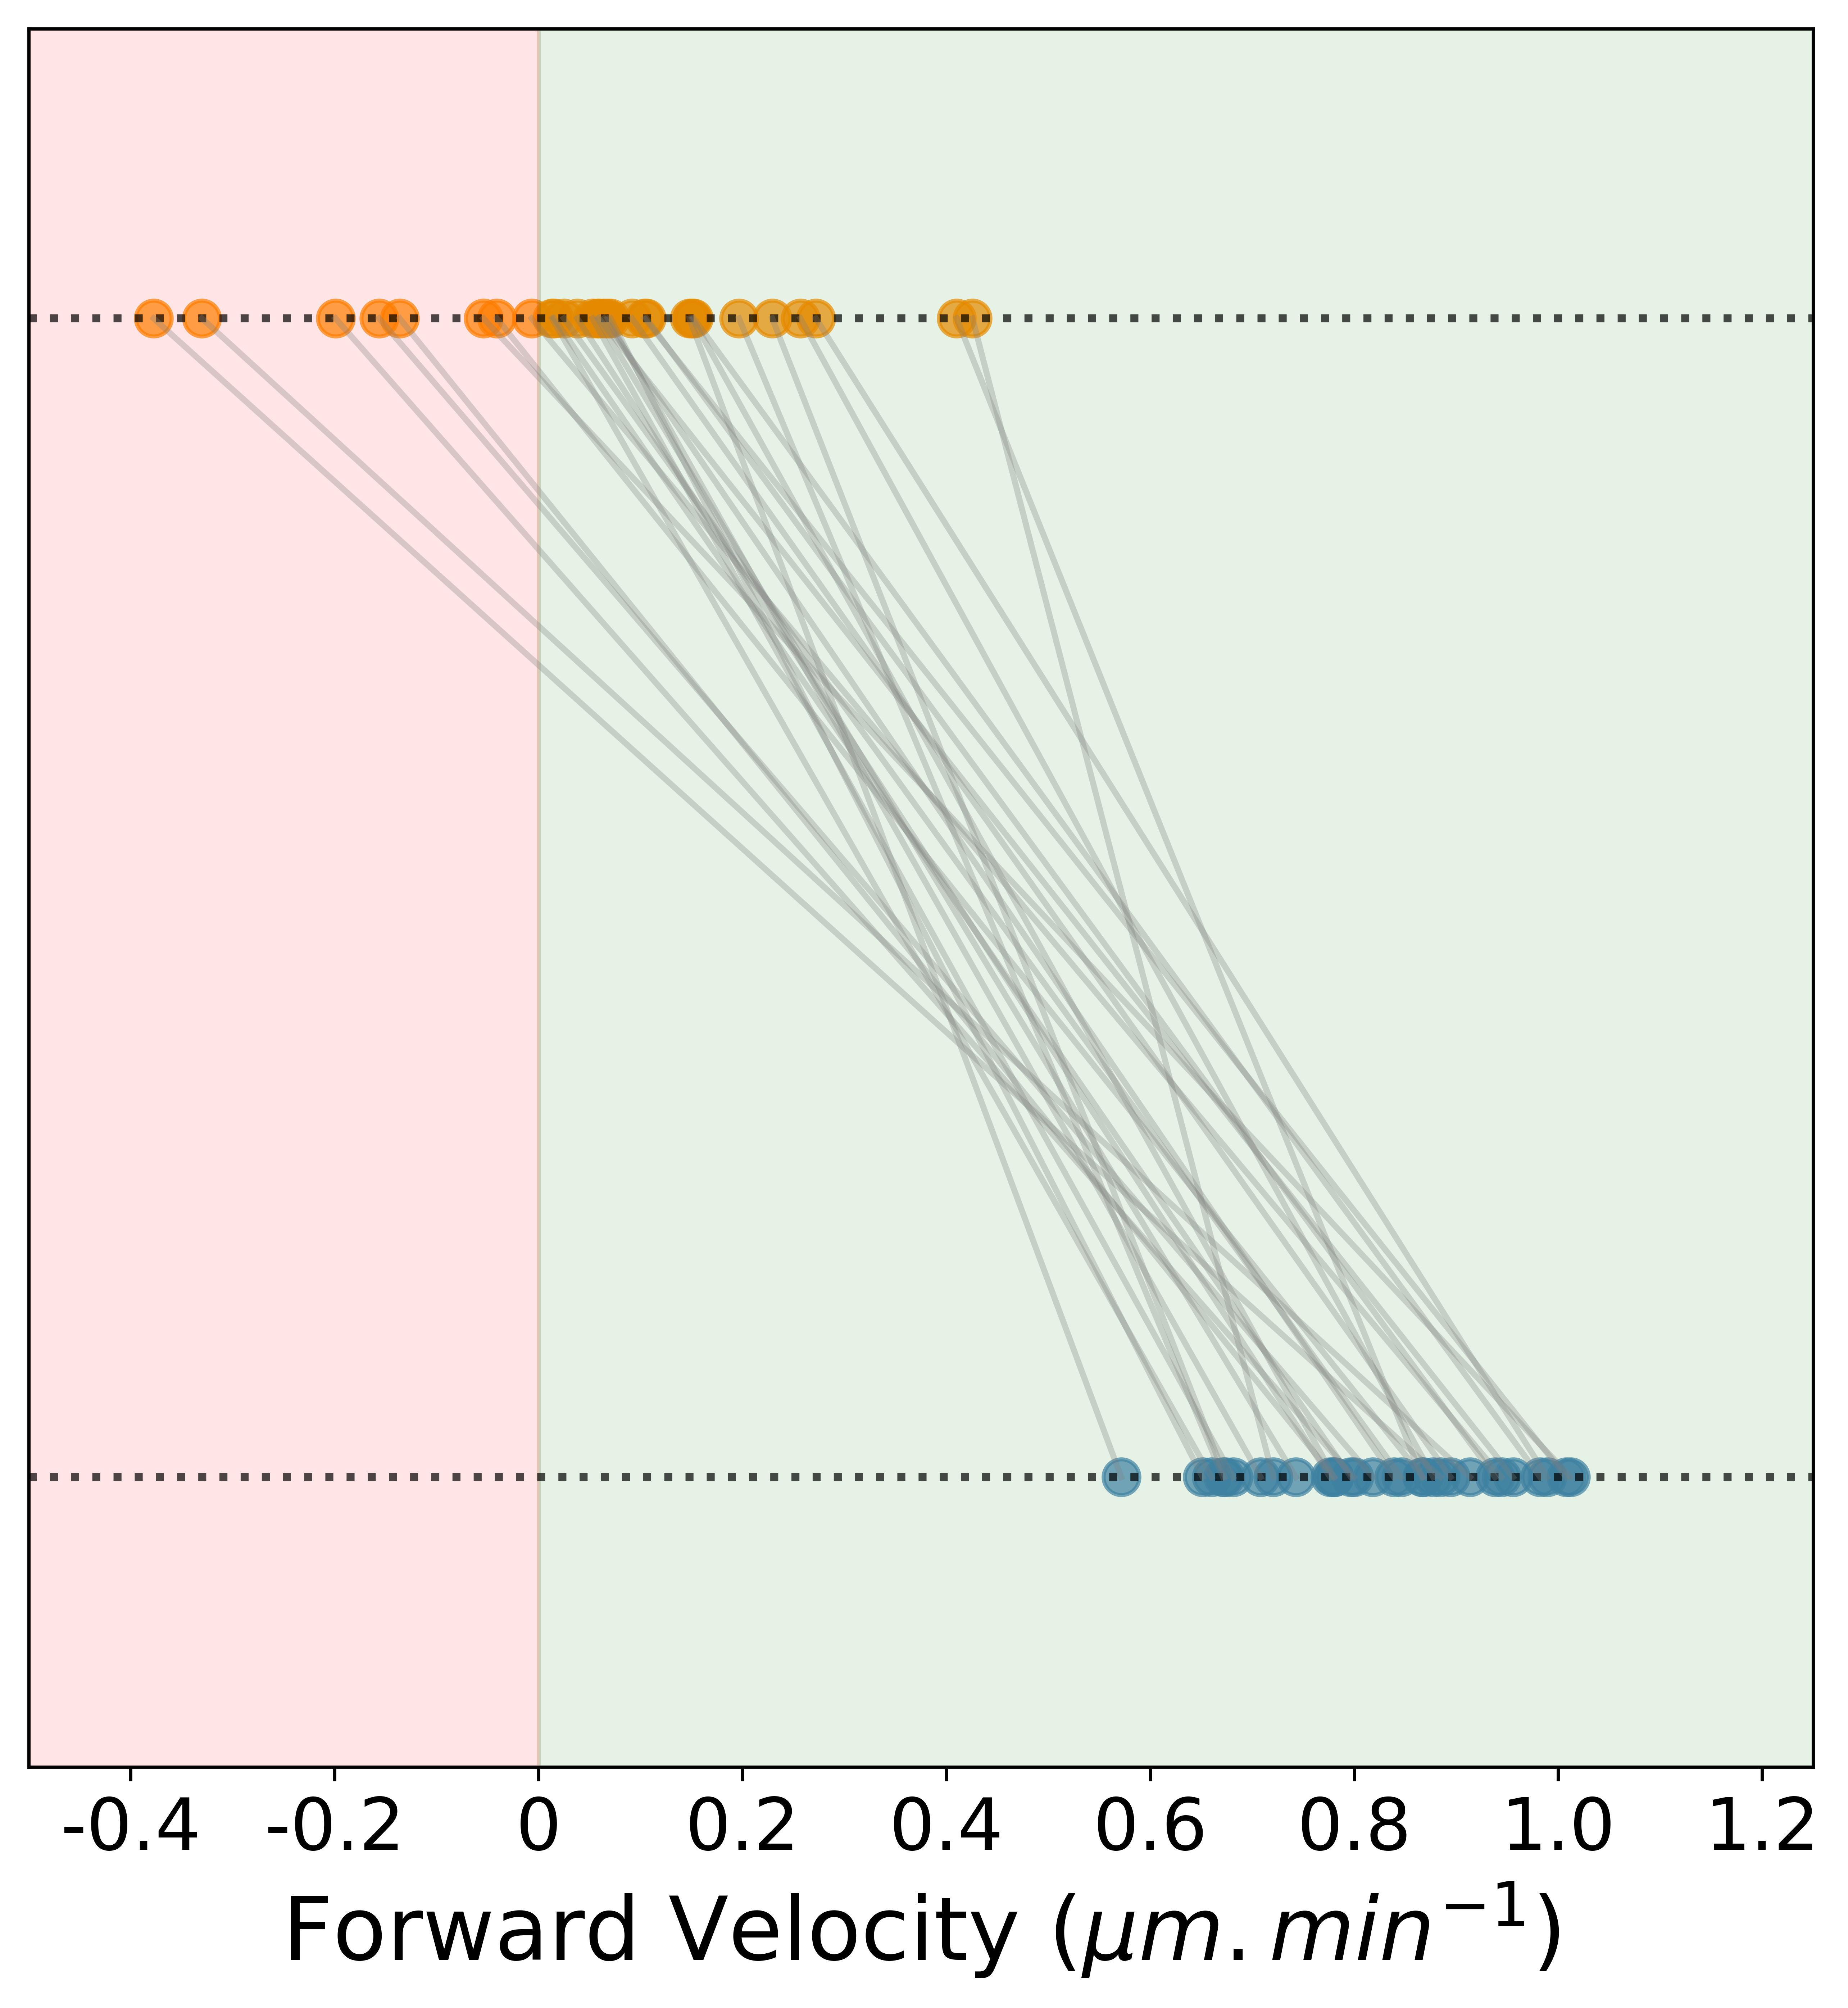

In [10]:
# Make the plot

# Define the function to make lines
def newline(p1, p2, color='black'):
    ax = plt.gca()
    line = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='grey', marker='', alpha = 0.3, markersize=6)
    ax.add_line(line)
    return line

fig, ax = plt.subplots(1,1,figsize=(8,8), dpi= 800)


# Calculate means
pre_mean = df['pre'].mean()
post_mean = df['post'].mean()


# Horizontal Lines
ax.hlines(y=0, xmin=-.5, xmax=1.25, color='black', alpha=0.7, linewidth=2, linestyles='dotted')
ax.hlines(y=1, xmin=-.5, xmax=1.25, color='black', alpha=0.7, linewidth=2, linestyles='dotted')


# Points
ax.scatter(y=np.repeat(1, df.shape[0]), x=df['pre'], s=80, alpha=0.7, color='darkorange')
ax.scatter(y=np.repeat(0, df.shape[0]), x=df['post'], s=80,  alpha=0.7, color='steelblue')

# Connecting lines
for p1, p2 in zip(df['pre'], df['post']):
    newline([p1,1], [p2,0])

    
# Set axis limits and label
ax.set_xlabel('Forward Velocity 'r'$(\mu m.min^{-1})$', fontsize=22)
ax.set_ylim(-.25,1.25)
ax.set_xlim(-0.5,1.25)

# Color the background
ax.axvspan(-0.5, 0, ymin=0, ymax=1, alpha=0.1, color='red')
ax.axvspan(0, 1.25, ymin=0, ymax=1, alpha=0.1, color='green')


# Turn off the yticks
plt.tick_params(
    axis='y',          # changes apply to the y-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off

xlabs = [-0.6, -0.4, -0.2, 0, .2, .4, .6, .8, 1.0, 1.2]

ax.set_xticklabels(xlabs, fontsize= 18)

#(optional) save figure to file)
plt.savefig("change_in_velocity_grouped_rotated_new.png", bbox_inches='tight', dpi=800)


